In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Kay\Downloads\car_scrape.csv')

In [2]:
#Le's see the data we have.
df.head()

,TITLE,BRAND,MAKE,ODOMETER,LOCATION,ISIMPORTED,ENGINE,TRANSMISSION,FUEL,PAINT,PRICE,YEAR
0,Toyota Corolla,Toyota,Corolla,60127,Lagos State,Locally used,4-cylinder(I4),Automatic,petrol,Silver,1995000,2009
1,Acura MDX,Acura,MDX,132908,Lagos State,Foreign Used,6-cylinder(V6),Automatic,petrol,Whine,3315000,2009
2,Lexus ES 350,Lexus,ES 350,120412,Lagos State,Locally used,6-cylinder(V6),Automatic,petrol,Silver,2655000,2008
3,Mercedes-Benz GLK 350,Mercedes-Benz,GLK 350,67640,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,Mercedes-Benz,E 200,92440,Abuja,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,5790000,2013


THOUGHT:
Data Exploration to answer some questions from this data set
The most sold vehicle in Nigeria and why?
Which cars are preferred, locally used, foreign used or new?
What state in Nigeria buys the most cars.


In [2]:
#Attempt at data cleaning.
df['BRAND'].unique()

array(['Toyota', 'Acura', 'Lexus', 'Mercedes-Benz', 'Ford', 'Honda',
       'Hyundai', 'Fiat', 'Dodge', 'Land', 'Mitsubishi', 'Mazda',
       'Volkswagen', 'IVECO', 'Scania', 'Volvo', 'IVM', 'MAN-VOLKSWAGEN',
       'Nissan', 'DAF', 'Kia', 'Iveco', 'BMW', 'Chevrolet', 'Peugeot',
       'Jeep', 'Porsche', 'MINI', 'Pontiac', 'Lincoln', 'Mack', 'Man',
       'Isuzu', 'Mercedes-Benz/52', 'Audi', 'ALPINA', 'JMC', 'Jaguar',
       'Infiniti', 'GMC', 'GAC', 'Bentley', 'Rolls-Royce'], dtype=object)

In [3]:
#Removing repetitive Brands with different appearances.
df['BRAND'] = df['BRAND'].replace(['Mercedes-Benz/52'], 'Mercedes-Benz')
df['BRAND'] = df['BRAND'].replace(['MAN-VOLKSWAGEN'], 'Volkswagen')
df['BRAND'] = df['BRAND'].replace(['Man'], 'Volkswagen')

In [4]:
#Viewing data info to aid further analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TITLE         1445 non-null   object
 1   BRAND         1445 non-null   object
 2   MAKE          1445 non-null   object
 3   ODOMETER      1445 non-null   int64 
 4   LOCATION      1445 non-null   object
 5   ISIMPORTED    1445 non-null   object
 6   ENGINE        1445 non-null   object
 7   TRANSMISSION  1445 non-null   object
 8   FUEL          1445 non-null   object
 9   PAINT         1445 non-null   object
 10  PRICE         1445 non-null   int64 
 11  YEAR          1445 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 135.6+ KB


In [5]:
#THIS dataset has a row of 1445 and 12 columns
df.shape

(1445, 12)

In [6]:
#Check the number of NaN in each column.
df.isna().sum().sort_values(ascending=False)

TITLE           0
BRAND           0
MAKE            0
ODOMETER        0
LOCATION        0
ISIMPORTED      0
ENGINE          0
TRANSMISSION    0
FUEL            0
PAINT           0
PRICE           0
YEAR            0
dtype: int64

In [7]:
#Checking dataset for negative values.
col=df.select_dtypes(include=['float64','int64']).columns
lt=list()
for i in col:
    y=any(x < 0 for x in df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


In [8]:
#Checking number of zero values contained in this data set.
total_zero=(df[df.loc[0:]==0]).count().sum()
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 35 zero values.


It is unlikelly for a used vehicle to have an Odometer reading of Zero.

In [3]:
#Cleaned the data such that any all rows with an ODOMETER VALUE of zero is replaced with nan.
df.replace(0,np.nan,inplace=True)
#now there are no zero values
total_zero=(df[df.loc[0:]==0]).count().sum()
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 0 zero values.


In [10]:
df.describe()

,ODOMETER,PRICE,YEAR
count,1.410000e+03,1.445000e+03,1445.000000
mean,1.197302e+05,8.434854e+06,2009.968858
std,1.159349e+05,1.309592e+07,5.587977
min,1.000000e+01,4.000000e+05,1980.000000
25%,5.678525e+04,2.640000e+06,2006.000000
50%,9.592500e+04,4.215000e+06,2010.000000
75%,1.545935e+05,8.915000e+06,2014.000000
max,1.775588e+06,1.670150e+08,2021.000000


Data Exploration to answer some questions from this data set
1. The most sold vehicle in Nigeria and why?

In [11]:
df.head()

,TITLE,BRAND,MAKE,ODOMETER,LOCATION,ISIMPORTED,ENGINE,TRANSMISSION,FUEL,PAINT,PRICE,YEAR
0,Toyota Corolla,Toyota,Corolla,60127.0,Lagos State,Locally used,4-cylinder(I4),Automatic,petrol,Silver,1995000,2009
1,Acura MDX,Acura,MDX,132908.0,Lagos State,Foreign Used,6-cylinder(V6),Automatic,petrol,Whine,3315000,2009
2,Lexus ES 350,Lexus,ES 350,120412.0,Lagos State,Locally used,6-cylinder(V6),Automatic,petrol,Silver,2655000,2008
3,Mercedes-Benz GLK 350,Mercedes-Benz,GLK 350,67640.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,Mercedes-Benz,E 200,92440.0,Abuja,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,5790000,2013


In [36]:
#Infer price of cars base on the data set.
predict_price =  df.groupby(['BRAND', 'MAKE'])['PRICE'].mean().map('{:,.0f}'.format).reset_index()
predict_price = predict_price.sort_values(by='BRAND', ascending=True)
predict_price#.to_clipboard(excel=True,sep='\t')


,BRAND,MAKE,PRICE
0,ALPINA,B3,"9,065,000"
1,Acura,MDX,"3,736,429"
2,Acura,RDX,"4,570,000"
3,Acura,TL,"2,169,333"
4,Acura,TSX,"3,615,000"
...,...,...,...
230,Volvo,FL12,"5,515,000"
231,Volvo,FL6,"5,715,000"
232,Volvo,FL7,"8,640,000"
233,Volvo,S80,"2,535,000"


In [13]:
#Predict price of cars base on the data set.
brand_price =  df.groupby(['BRAND'])['PRICE'].mean().map('{:,.0f}'.format).reset_index()
brand_price = brand_price.sort_values(by='BRAND', ascending=True)
brand_price.head(10)#.to_clipboard(excel=True,sep='\t')


,BRAND,PRICE
0,ALPINA,"9,065,000"
1,Acura,"3,583,071"
2,Audi,"1,215,000"
3,BMW,"13,212,692"
4,Bentley,"28,015,000"
5,Chevrolet,"10,580,000"
6,DAF,"6,395,000"
7,Dodge,"3,815,000"
8,Fiat,"950,000"
9,Ford,"5,604,391"


In [30]:
#This is to know the most popular brand in the market
popular_brand = df.groupby(['BRAND']).agg(
percent_popular_brand =('MAKE', lambda p: (p.count() / df['MAKE'].count()) * 100))
popular_brand = popular_brand.sort_values(by='percent_popular_brand', ascending=False)
popular_brand = popular_brand.head(10)#.to_clipboard(excel=True,sep='\t')
popular_brand


,percent_popular_brand
BRAND,
Toyota,48.166090
Lexus,12.110727
Mercedes-Benz,10.173010
Honda,7.958478
Ford,3.183391
Hyundai,2.422145
Nissan,2.145329
Land,1.730104
Kia,1.176471


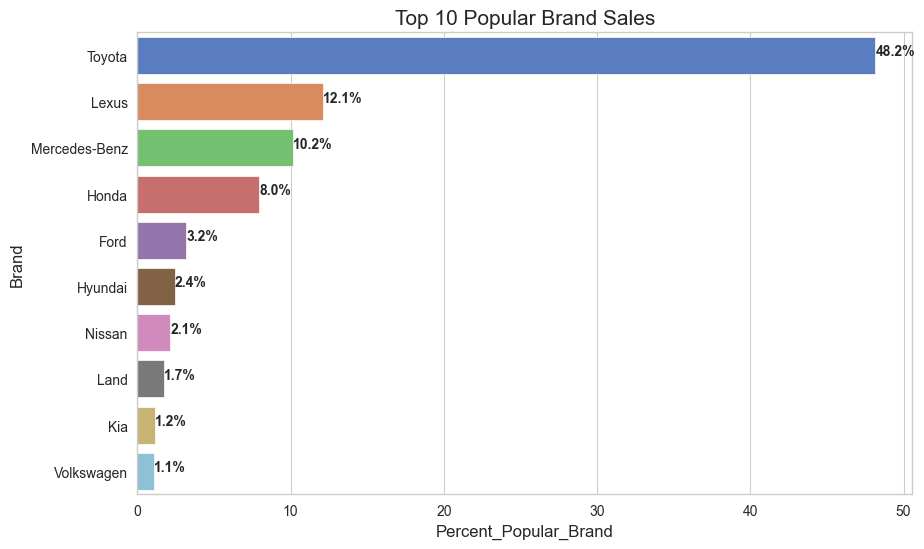

In [54]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='percent_popular_brand', y=popular_brand.index, data=popular_brand, errorbar=None, palette="muted",orient='h' )
ax.set_title("Top 10 Popular Brand Sales", fontsize=15)
ax.set_xlabel ("Percent_Popular_Brand")
ax.set_ylabel ("Brand")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

In [38]:
#This is to know the most popular car in the market
#popular_car = df.groupby(['BRAND', 'MAKE'])['ENGINE'].count().transform(lambda x: (x/x.sum())*100).reset_index()#coverted my query to percentage
popular_car = df.groupby(['BRAND', 'MAKE']).agg(
percent_number_sales =('MAKE', lambda p: (p.count() / df['MAKE'].count()) * 100))
popular_car = popular_car.sort_values(by='percent_number_sales', ascending=False)
popular_car#.to_clipboard(excel=True,sep='\t')

percent_number_sales
BRAND         MAKE                                   
Toyota        Camry                         12.525952
              Corolla                       11.003460
              Highlander                     5.467128
              Sienna                         5.397924
              RAV 4                          4.083045
...                                               ...
Mercedes-Benz GLA 250                        0.069204
              GLA 180                        0.069204
Iveco         EUROCARGO 1.2E+20              0.069204
JMC           Vigus                          0.069204
ALPINA        B3                             0.069204

[236 rows x 1 columns]

In [39]:
expensive_cars = df.groupby(['BRAND'])['PRICE'].mean().reset_index()
expensive_cars = expensive_cars.sort_values(by='PRICE', ascending=False)
expensive_cars = expensive_cars.head(20)
expensive_cars.head()

,BRAND,PRICE
38,Rolls-Royce,117515004.0
32,Mercedes-Benz/52,75015000.0
23,Land,34196600.0
4,Bentley,28015000.0
37,Porsche,20025000.0


Text(0, 0.5, '')

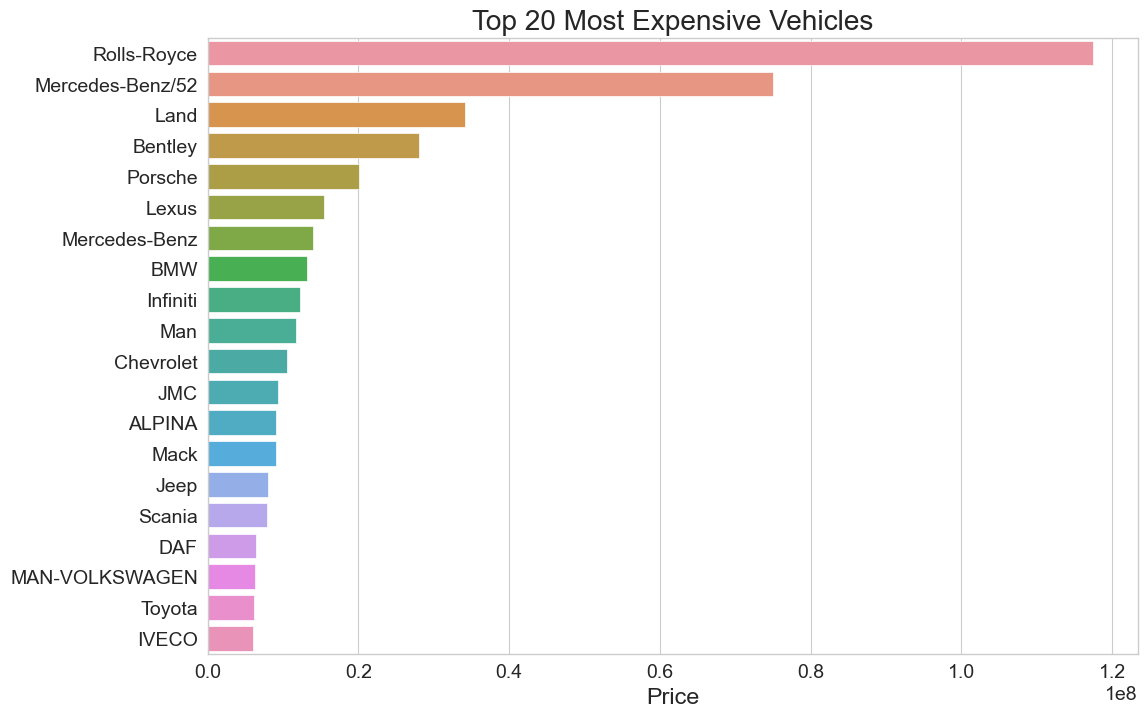

In [41]:

plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='PRICE',y='BRAND',data=expensive_cars)
plt.title('Top 20 Most Expensive Vehicles')
plt.xlabel('Price')
plt.ylabel('')

From the Bar graph above we can see that Toyota is not the cheapest Brand in the Market yet it is the most popular.

In [16]:
#This is to know the unique engine types in the market
df['ENGINE'].unique()


array(['4-cylinder(I4)', '6-cylinder(V6)', '8-cylinder(V8)',
       '6-cylinder(I6)', '5-cylinder(I5)', '3-cylinder(I3)',
       '4-cylinder(H4)', '12-cylinder(V12)', '2-cylinder(I2)'],
      dtype=object)

In [62]:

engine_type = df.groupby(['ENGINE'])['BRAND'].count().reset_index()
engine_type = engine_type.sort_values(by='BRAND', ascending=False)
engine_type#.to_clipboard(excel=True,sep='\t')

,ENGINE,BRAND
4,4-cylinder(I4),892
7,6-cylinder(V6),310
6,6-cylinder(I6),161
8,8-cylinder(V8),70
2,3-cylinder(I3),4
5,5-cylinder(I5),3
1,2-cylinder(I2),2
3,4-cylinder(H4),2
0,12-cylinder(V12),1


In [16]:
popular_engine = df.loc[(df['ENGINE'] == '4-cylinder(I4)')]
popular_engine

,TITLE,BRAND,MAKE,ODOMETER,LOCATION,ISIMPORTED,ENGINE,TRANSMISSION,FUEL,PAINT,PRICE,YEAR
0,Toyota Corolla,Toyota,Corolla,60127.0,Lagos State,Locally used,4-cylinder(I4),Automatic,petrol,Silver,1995000,2009
3,Mercedes-Benz GLK 350,Mercedes-Benz,GLK 350,67640.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,Mercedes-Benz,E 200,92440.0,Abuja,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,5790000,2013
5,Mercedes-Benz E 300,Mercedes-Benz,E 300,39979.0,Abuja,Foreign Used,4-cylinder(I4),Automatic,petrol,Brown,19440000,2016
6,Toyota Corolla,Toyota,Corolla,144211.0,Lagos State,Locally used,4-cylinder(I4),Automatic,petrol,Silver,1995000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Hyundai Sonata,Hyundai,Sonata,103811.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Red,3585000,2011
1431,Toyota Corolla,Toyota,Corolla,72646.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Grey,4215000,2013
1436,Toyota Matrix,Toyota,Matrix,102610.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Blue,2160000,2003
1438,Toyota Camry,Toyota,Camry,28990.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,16815000,2018


In [22]:
popular_engine_count = popular_engine.groupby(['BRAND', 'MAKE']).agg(
    percent_popular_engine_count =('MAKE', lambda p: (p.count() / df['MAKE'].count()) * 100))#coverted my query to percentage
popular_engine_count.sort_values(by= 'percent_popular_engine_count', ascending=False)#.to_clipboard(excel=True,sep='\t')

percent_popular_engine_count
BRAND         MAKE                                     
Toyota        Camry                           11.764706
              Corolla                         10.519031
              RAV 4                            3.460208
Honda         Accord                           3.114187
Toyota        Highlander                       1.591696
...                                                 ...
Mercedes-Benz CLS 500                          0.069204
              C 63                             0.069204
              C 450                            0.069204
              C 250                            0.069204
Volvo         XC90                             0.069204

[156 rows x 1 columns]

In [42]:
popular_engine_count = popular_engine.groupby(['BRAND']).agg(
    percent_popular_engine_count =('BRAND', lambda p: (p.count() / df['BRAND'].count()) * 100))#coverted my query to percentage
popular_engine_count=popular_engine_count.sort_values(by= 'percent_popular_engine_count', ascending=False)#.to_clipboard(excel=True,sep='\t')
popular_engine_count.head()

,percent_popular_engine_count
BRAND,
Toyota,34.671280
Honda,5.882353
Lexus,4.775087
Mercedes-Benz,4.013841
Hyundai,1.937716


It is not a coincedence that the most popular cars in the mmarket has the 4-cylinder(I4) Engine.
Therefore, it is safe to say that the Engine features of a car is the nost important factor that buyers look out for.

In [73]:
#This is to know the latest car types in the market
df['YEAR'].max()


2021

In [13]:

model_year_count = df.groupby(['YEAR']).agg(
    percent_model_year_count =('YEAR', lambda p: (p.count() / df['YEAR'].count()) * 100))#coverted my query to percentage
model_year_count.sort_values(by= 'percent_model_year_count',ascending=False)#.to_clipboard(excel=True,sep='\t')

,percent_model_year_count
YEAR,
2008,7.266436
2010,6.643599
2013,6.643599
2011,6.574394
2007,6.366782
2016,6.297578
2009,6.089965
2014,6.089965
2006,5.605536


Text(0, 0.5, 'Percent_Model_Year_Count')

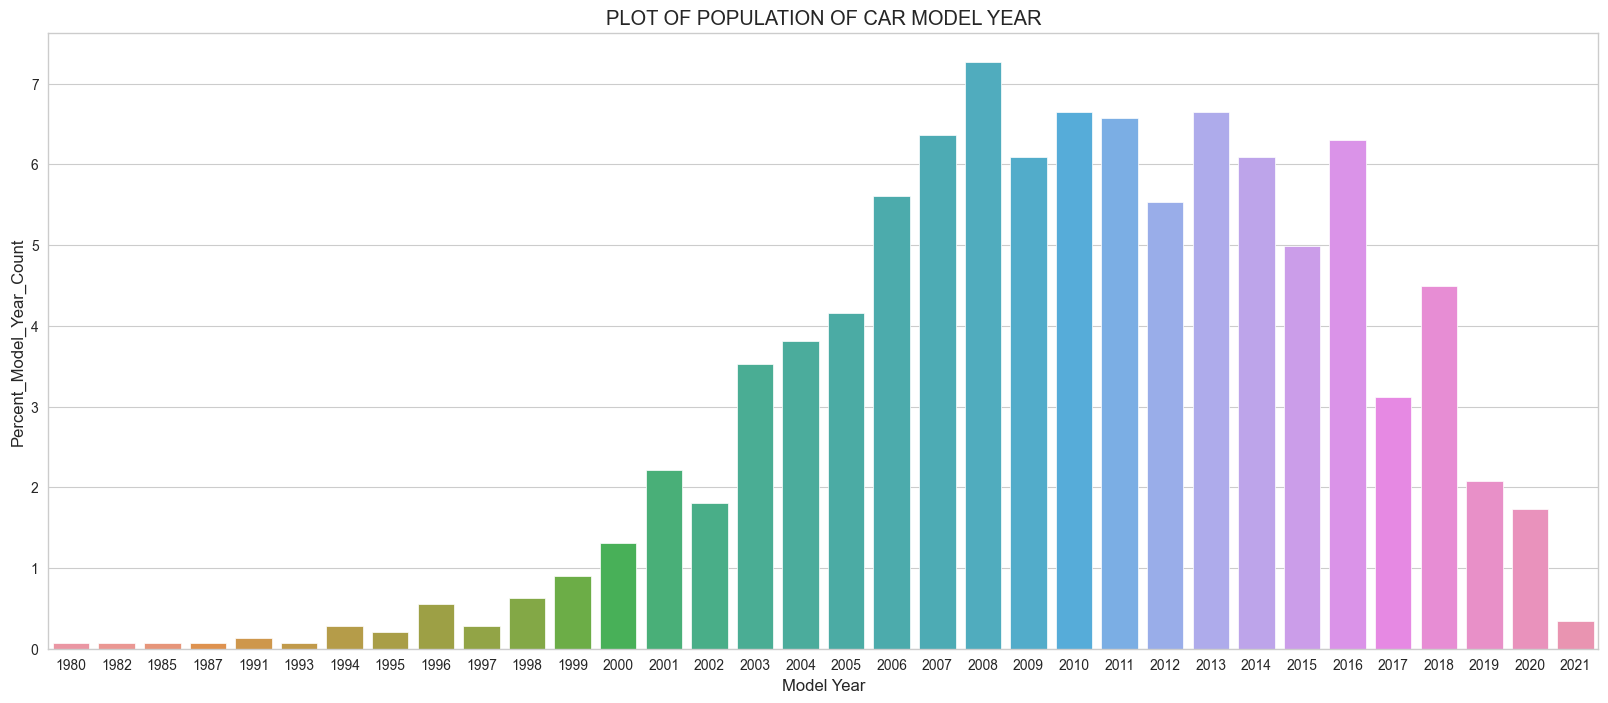

In [47]:
plt.figure(figsize=(20,8))
matplotlib.rcParams['font.size']=10
sns.barplot(x= model_year_count.index,y='percent_model_year_count',data=model_year_count)
plt.title('PLOT OF POPULATION OF CAR MODEL YEAR')
plt.xlabel('Model Year')
plt.ylabel('Percent_Model_Year_Count')

From the result above it is safe to say that the model year is not an important factor of consideration for buyers.

In [95]:
df.head()

,TITLE,BRAND,MAKE,ODOMETER,LOCATION,ISIMPORTED,ENGINE,TRANSMISSION,FUEL,PAINT,PRICE,YEAR
0,Toyota Corolla,Toyota,Corolla,60127.0,Lagos State,Locally used,4-cylinder(I4),Automatic,petrol,Silver,1995000,2009
1,Acura MDX,Acura,MDX,132908.0,Lagos State,Foreign Used,6-cylinder(V6),Automatic,petrol,Whine,3315000,2009
2,Lexus ES 350,Lexus,ES 350,120412.0,Lagos State,Locally used,6-cylinder(V6),Automatic,petrol,Silver,2655000,2008
3,Mercedes-Benz GLK 350,Mercedes-Benz,GLK 350,67640.0,Lagos State,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,Mercedes-Benz,E 200,92440.0,Abuja,Foreign Used,4-cylinder(I4),Automatic,petrol,Black,5790000,2013


In [89]:
color_count = df.groupby(['PAINT']).agg(
    percent_color_count =('PAINT', lambda p: (p.count() / df['PAINT'].count()) * 100))#coverted my query to percentage
color_count=color_count.sort_values(by= 'percent_color_count',ascending=False)#.to_clipboard(excel=True,sep='\t')
color_count= color_count.head(20)
color_count.head()

,percent_color_count
PAINT,
Black,28.235294
Silver,11.280277
White,11.072664
Grey,7.889273
Blue,6.643599


Text(0, 0.5, 'Percentage_Color_Count')

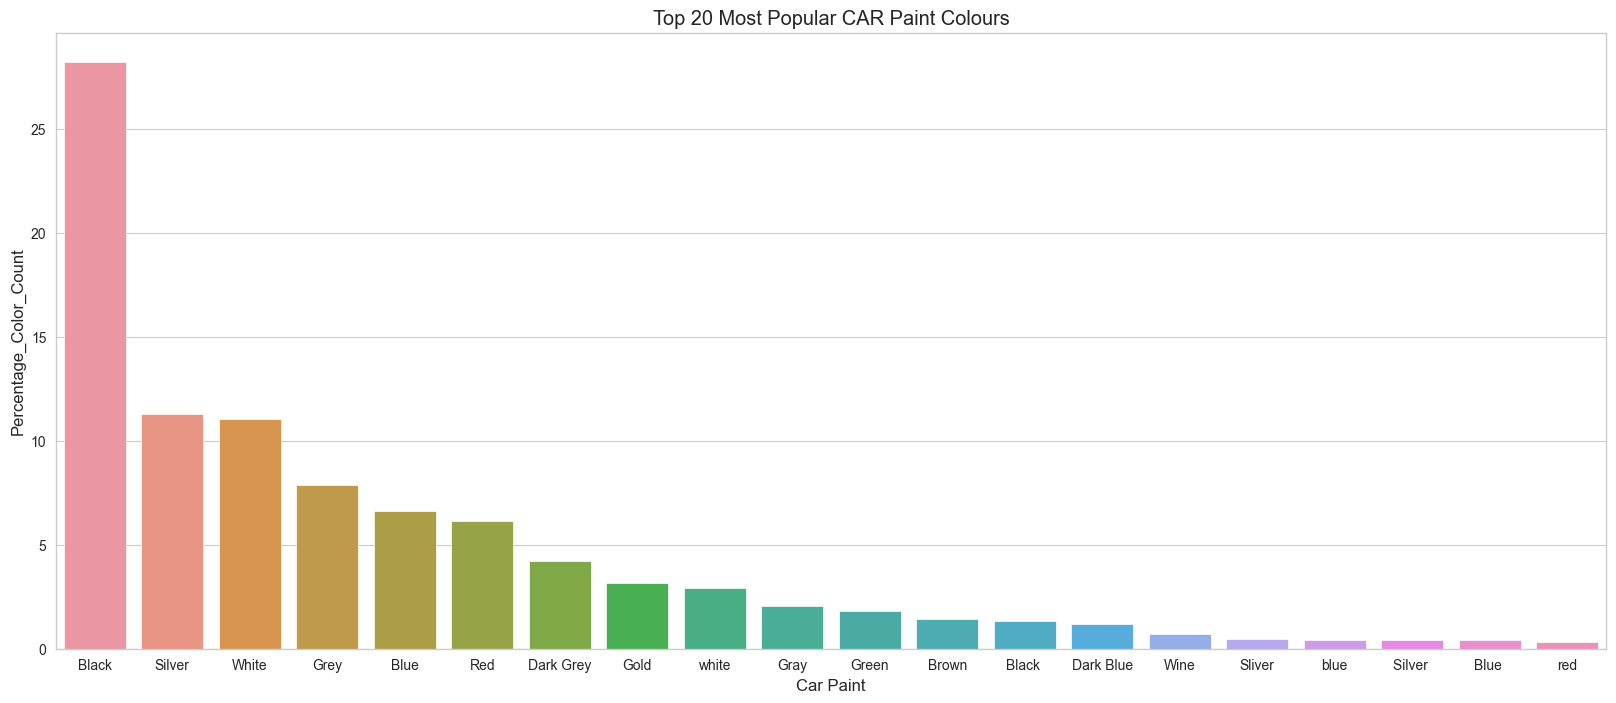

In [52]:
plt.figure(figsize=(20,8))
matplotlib.rcParams['font.size']=10
sns.barplot(x= color_count.index,y='percent_color_count',data=color_count)
plt.title('Top 20 Most Popular CAR Paint Colours')
plt.xlabel('Car Paint')
plt.ylabel('Percentage_Color_Count')

From the result above we can see that buyers prefer BLACK PAINT cars.

In [55]:
location_count = df.groupby(['LOCATION']).agg(
    percent_location_count =('BRAND', lambda p: (p.count() / df['BRAND'].count()) * 100))#coverted my query to percentage
location_count = location_count.sort_values(by= 'percent_location_count',ascending=False)#.to_clipboard(excel=True,sep='\t')
location_count

,percent_location_count
LOCATION,
Lagos State,82.076125
Abuja,15.086505
Ogun State,2.560554
Abia State,0.207612
Adamawa,0.069204


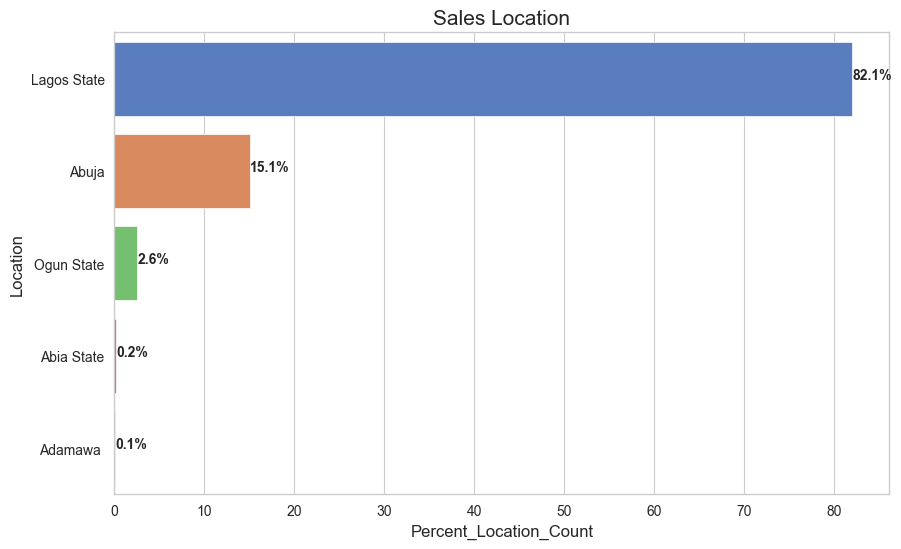

In [57]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='percent_location_count', y=location_count.index, data=location_count, errorbar=None, palette="muted",orient='h' )
ax.set_title("Sales Location", fontsize=15)
ax.set_xlabel ("Percent_Location_Count")
ax.set_ylabel ("Location")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

In [11]:
buyer_location = df.loc[(df['LOCATION'] == 'Lagos State')]
                     
popular_lagos = buyer_location.groupby(['BRAND', 'MAKE']).agg(
    percent_buyer_loc =('MAKE', lambda p: (p.count() / df['MAKE'].count()) * 100))#coverted my query to percentage
popular_lagos.sort_values(by= 'percent_buyer_loc',ascending=False)#.to_clipboard(excel=True,sep='\t')

percent_buyer_loc
BRAND         MAKE                                
Toyota        Camry                      10.380623
              Corolla                     8.373702
              Highlander                  4.221453
              Sienna                      4.221453
              RAV 4                       3.460208
...                                            ...
Isuzu         CABSTER                     0.069204
              NQR                         0.069204
Iveco         EUROCARGO 1.2E+20           0.069204
Mercedes-Benz E 550                       0.069204
ALPINA        B3                          0.069204

[211 rows x 1 columns]

From the result above we can see that Lagos state has the highest number of buyers. 
The majority of the cars bought in Lagos is the Toyota Brand
and the Toyota Camry make to be precise.

In [67]:
#To investigate Buyers preference Foreign vs Local Vs New
isimported_count = df.groupby(['ISIMPORTED'])["BRAND"].count()
isimported_count

ISIMPORTED
Foreign Used    1062
Locally used     343
New               40
Name: BRAND, dtype: int64

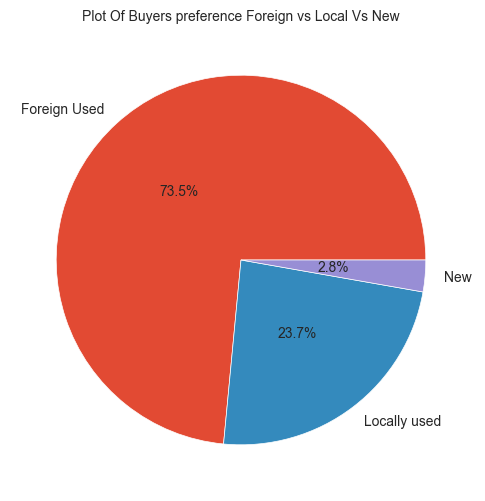

In [69]:
#Using matplotlib
matplotlib.rcParams['font.size']=10
pie, ax = plt.subplots(figsize=[10,6])
labels = isimported_count.keys()
plt.pie(x=isimported_count,autopct="%.1f%%",  explode=[0, 0,0], labels=labels, pctdistance=0.5)
plt.title("Plot Of Buyers preference Foreign vs Local Vs New", fontsize=10);
pie.savefig("DeliveryPieChart.png")

From the result above we can see that buyers prefer foreign used cars.

In [84]:
isimported_price = df.groupby(['ISIMPORTED']).agg({'PRICE': ['min','mean', 'max' ]}).round(2)
isimported_price = isimported_price.sort_values(by= 'ISIMPORTED',ascending=False)#.to_clipboard(excel=True,sep='\t')
isimported_price#.to_clipboard(excel=True,sep='\t')

PRICE                        
                  min         mean        max
ISIMPORTED                                   
New           2615000  39518000.20  167015008
Locally used   400000   4219316.35  150015008
Foreign Used   950000   8625629.48  117015000

Although foreign used cars are not the cheapest, they are preferred to locally used cars.

In [86]:
isimported_odometer = df.groupby(['ISIMPORTED']).agg({'ODOMETER': ['mean','min', 'max' ]}).round(2)
isimported_odometer#.to_clipboard(excel=True,sep='\t')

ODOMETER                 
                   mean   min        max
ISIMPORTED                              
Foreign Used  104620.08  16.0  1775588.0
Locally used  183545.47  82.0   987322.0
New            13432.92  10.0   189423.0

From the result above, we can see that the Average Odometer reading of a Foreign used car is lesser than that of a locally used car.
That is a Foreign used car has travelled lesser millage/ has been used not as much as a locally used car.
This is reasonably bias why the foreign used car is preferred to the locally used car.